# Diffusion-regularised UNet Autoencoder

Modular training and evaluation notebook (AE warm-start, joint training, metrics, visualisations, ablations).

In [1]:
# CELL 0: Environment setup (Colab, optional) + repo clone
import os, sys, shutil

IN_COLAB = 'google.colab' in sys.modules
REPO_URL = "https://github.com/onyebuchiedigbo-uk/diffusion-regularised-ae.git"
REPO_DIR = "diffusion-regularised-ae"

if IN_COLAB:
    # Install dependencies
    !pip install --upgrade pip -q
    !pip install torch torchvision torchaudio -q
    !pip install diffusers[torch] transformers accelerate einops -q
    !pip install scikit-image scikit-learn umap-learn matplotlib seaborn tqdm lpips pytorch-msssim pandas -q
    !pip install torch-fidelity -q

    # Clone or refresh repo under /content
    %cd /content
    if os.path.exists(REPO_DIR):
        shutil.rmtree(REPO_DIR)
    !git clone {REPO_URL}
    %cd {REPO_DIR}

else:
    print("Running outside Colab; make sure this notebook is in the repo root.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00
/content
Cloning into 'diffusion-regularised-ae'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 49 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 31.95 KiB | 3.99 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/diffusion-regularised-ae


In [2]:
# CELL 1: Global setup & imports
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# LaTeX-like fonts for all figures
plt.rcParams.update({
    "font.size": 11,
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "mathtext.rm": "serif",
})

from train_ae import train_ae
from train_joint import train_joint
from eval import run_eval
from ablation import run_ablation

100%|██████████| 170M/170M [00:05<00:00, 28.4MB/s]


=== Autoencoder warm-start training ===


Epoch 00 | train_mse=7.333e-03 | val_mse=2.579e-03


Epoch 01 | train_mse=2.130e-03 | val_mse=1.856e-03


Epoch 02 | train_mse=1.703e-03 | val_mse=9.165e-04


Epoch 03 | train_mse=1.544e-03 | val_mse=9.373e-04


Epoch 04 | train_mse=1.403e-03 | val_mse=1.348e-03


Epoch 05 | train_mse=1.355e-03 | val_mse=1.136e-03


Epoch 06 | train_mse=1.234e-03 | val_mse=6.235e-04


Epoch 07 | train_mse=1.242e-03 | val_mse=5.752e-04


Epoch 08 | train_mse=1.139e-03 | val_mse=7.470e-04


Epoch 09 | train_mse=1.061e-03 | val_mse=3.973e-04


Epoch 10 | train_mse=1.009e-03 | val_mse=4.541e-04


Epoch 11 | train_mse=1.003e-03 | val_mse=4.259e-04


Epoch 12 | train_mse=1.006e-03 | val_mse=5.206e-04


Epoch 13 | train_mse=1.040e-03 | val_mse=6.622e-04


Epoch 14 | train_mse=9.813e-04 | val_mse=9.157e-04


Epoch 15 | train_mse=8.465e-04 | val_mse=1.470e-03


Epoch 16 | train_mse=8.841e-04 | val_mse=3.121e-04


Epoch 17 | train_mse=8.354e-04 | val_mse=5.404e-04


Epoch 18 | train_mse=9.580e-04 | val_mse=5.205e-04


Epoch 19 | train_mse=8.083e-04 | val_mse=3.125e-04
Saved AE warm-start checkpoint and history.


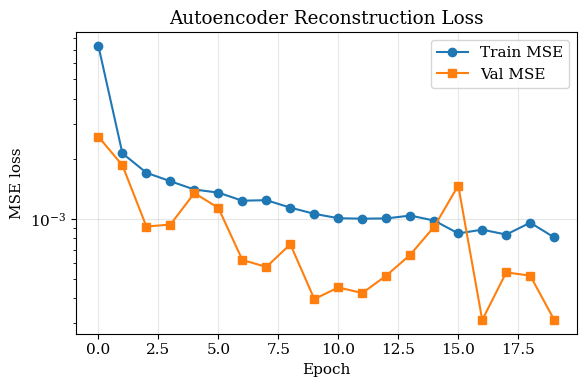

Saved AE training curves to: figures/ae_training_curves.pdf


In [3]:
# CELL 2: Autoencoder warm-start training
history_ae = train_ae()

Encoder frozen (weights + BN stats).
Joint training setup complete.
=== Joint optimisation (decoder + denoiser) ===


Epoch 00 | AE=6.593e-04 | DIFF=1.808e-01 | TOT=8.181e-04 | VAL=2.442e-04 | λ=0.102 | gn_ae=0.025 | gn_den=0.004


Epoch 01 | AE=5.309e-04 | DIFF=8.017e-03 | TOT=7.291e-04 | VAL=2.120e-04 | λ=1.019 | gn_ae=0.024 | gn_den=0.012


Epoch 02 | AE=4.796e-04 | DIFF=1.566e-03 | TOT=7.699e-04 | VAL=1.973e-04 | λ=4.548 | gn_ae=0.024 | gn_den=0.017


Epoch 03 | AE=4.792e-04 | DIFF=6.542e-04 | TOT=8.609e-04 | VAL=1.905e-04 | λ=10.287 | gn_ae=0.016 | gn_den=0.086


Epoch 04 | AE=4.365e-04 | DIFF=4.268e-04 | TOT=8.536e-04 | VAL=1.866e-04 | λ=12.162 | gn_ae=0.033 | gn_den=0.034


Epoch 05 | AE=4.368e-04 | DIFF=3.466e-04 | TOT=8.289e-04 | VAL=1.830e-04 | λ=18.621 | gn_ae=0.029 | gn_den=0.063


Epoch 06 | AE=3.985e-04 | DIFF=2.163e-04 | TOT=7.708e-04 | VAL=1.793e-04 | λ=23.875 | gn_ae=0.027 | gn_den=0.048


Epoch 07 | AE=3.817e-04 | DIFF=1.947e-04 | TOT=7.516e-04 | VAL=1.765e-04 | λ=26.880 | gn_ae=0.016 | gn_den=0.080


Epoch 08 | AE=3.566e-04 | DIFF=1.438e-04 | TOT=7.110e-04 | VAL=1.732e-04 | λ=27.225 | gn_ae=0.014 | gn_den=0.080


Epoch 09 | AE=3.692e-04 | DIFF=1.409e-04 | TOT=7.384e-04 | VAL=1.709e-04 | λ=27.948 | gn_ae=0.029 | gn_den=0.043


Epoch 10 | AE=3.553e-04 | DIFF=1.016e-04 | TOT=6.851e-04 | VAL=1.689e-04 | λ=37.037 | gn_ae=0.023 | gn_den=0.061


Epoch 11 | AE=3.293e-04 | DIFF=9.013e-05 | TOT=6.570e-04 | VAL=1.660e-04 | λ=37.027 | gn_ae=0.010 | gn_den=0.048


Epoch 12 | AE=3.167e-04 | DIFF=7.868e-05 | TOT=6.098e-04 | VAL=1.639e-04 | λ=49.013 | gn_ae=0.010 | gn_den=0.077


Epoch 13 | AE=3.176e-04 | DIFF=7.088e-05 | TOT=6.274e-04 | VAL=1.620e-04 | λ=54.545 | gn_ae=0.026 | gn_den=0.070


Epoch 14 | AE=2.959e-04 | DIFF=5.918e-05 | TOT=5.751e-04 | VAL=1.599e-04 | λ=66.924 | gn_ae=0.017 | gn_den=0.046


Epoch 15 | AE=2.847e-04 | DIFF=4.974e-05 | TOT=5.591e-04 | VAL=1.576e-04 | λ=76.480 | gn_ae=0.014 | gn_den=0.097


Epoch 16 | AE=2.789e-04 | DIFF=4.031e-05 | TOT=5.514e-04 | VAL=1.553e-04 | λ=82.757 | gn_ae=0.016 | gn_den=0.104


Epoch 17 | AE=2.778e-04 | DIFF=3.895e-05 | TOT=5.489e-04 | VAL=1.542e-04 | λ=90.260 | gn_ae=0.016 | gn_den=0.197


Epoch 18 | AE=2.779e-04 | DIFF=3.826e-05 | TOT=5.638e-04 | VAL=1.532e-04 | λ=78.630 | gn_ae=0.014 | gn_den=0.045


Epoch 19 | AE=2.621e-04 | DIFF=2.876e-05 | TOT=5.018e-04 | VAL=1.523e-04 | λ=106.241 | gn_ae=0.013 | gn_den=0.086


Epoch 20 | AE=2.486e-04 | DIFF=2.940e-05 | TOT=5.115e-04 | VAL=1.507e-04 | λ=83.045 | gn_ae=0.012 | gn_den=0.088


Epoch 21 | AE=2.489e-04 | DIFF=2.351e-05 | TOT=4.717e-04 | VAL=1.502e-04 | λ=123.565 | gn_ae=0.014 | gn_den=0.152


Epoch 22 | AE=2.434e-04 | DIFF=2.244e-05 | TOT=4.803e-04 | VAL=1.495e-04 | λ=136.435 | gn_ae=0.042 | gn_den=0.071


Epoch 23 | AE=2.315e-04 | DIFF=2.035e-05 | TOT=4.609e-04 | VAL=1.486e-04 | λ=138.062 | gn_ae=0.009 | gn_den=0.032


Epoch 24 | AE=2.357e-04 | DIFF=1.938e-05 | TOT=4.651e-04 | VAL=1.478e-04 | λ=150.321 | gn_ae=0.027 | gn_den=0.049


Epoch 25 | AE=2.255e-04 | DIFF=1.849e-05 | TOT=4.518e-04 | VAL=1.476e-04 | λ=145.424 | gn_ae=0.021 | gn_den=0.026


Epoch 26 | AE=2.312e-04 | DIFF=1.773e-05 | TOT=4.568e-04 | VAL=1.477e-04 | λ=156.513 | gn_ae=0.014 | gn_den=0.051


Epoch 27 | AE=2.264e-04 | DIFF=1.738e-05 | TOT=4.513e-04 | VAL=1.470e-04 | λ=156.389 | gn_ae=0.018 | gn_den=0.029


Epoch 28 | AE=2.223e-04 | DIFF=1.696e-05 | TOT=4.427e-04 | VAL=1.464e-04 | λ=157.124 | gn_ae=0.008 | gn_den=0.022


Epoch 29 | AE=2.240e-04 | DIFF=1.680e-05 | TOT=4.463e-04 | VAL=1.465e-04 | λ=157.240 | gn_ae=0.011 | gn_den=0.040
Joint training finished and checkpoints saved.


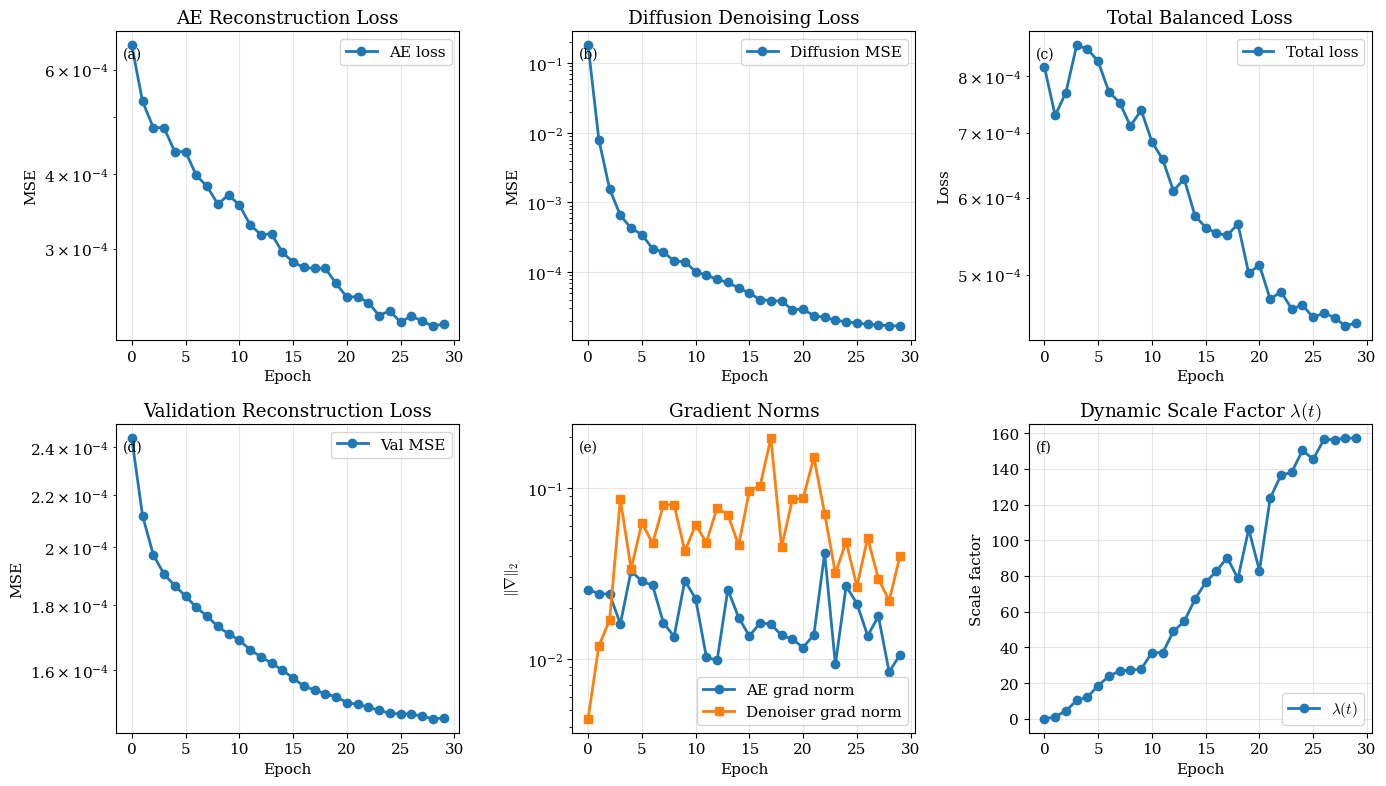

Saved joint training curves to: figures/joint_training_curves.pdf


In [4]:
# CELL 3: Joint training (decoder + denoiser)
history_joint = train_joint()

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 232MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth


Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth


Saved 5000 FID image pairs.


100%|██████████| 91.2M/91.2M [00:00<00:00, 217MB/s]



Reconstruction + FID Results (CIFAR-10 test set)
   PSNR   SSIM  LPIPS    FID  FID_samples
45.1505 0.9982 0.0017 0.7363         5000


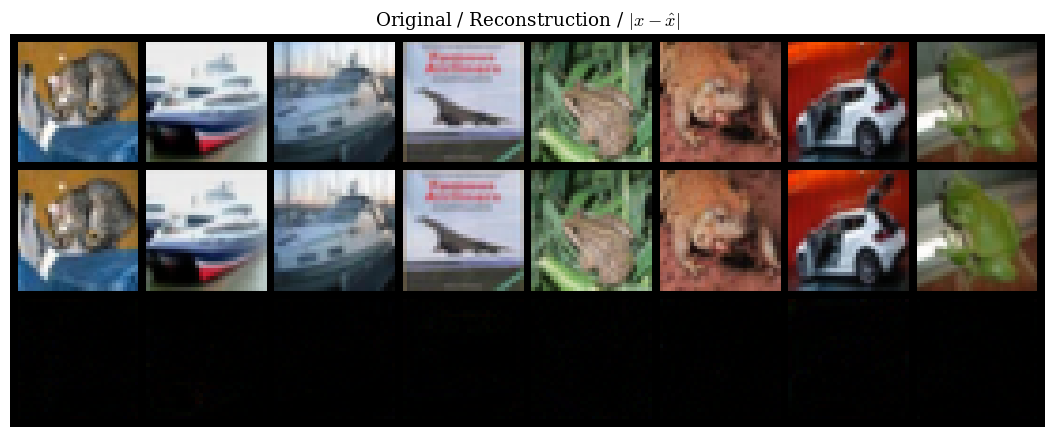

Saved reconstruction grid to: figures/recon_grid.pdf


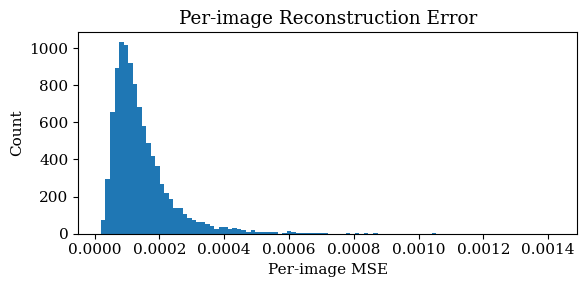

Saved per-image MSE histogram to: figures/per_image_mse_hist.pdf


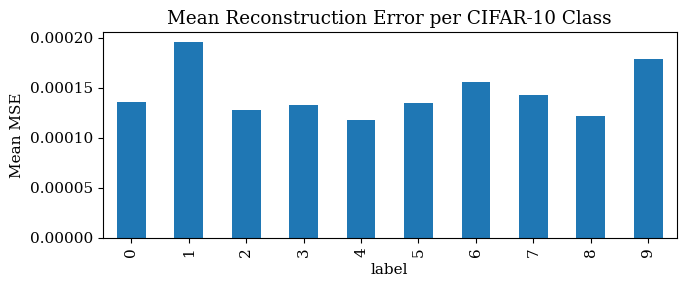

Saved per-class MSE bar plot to: figures/per_class_mse.pdf
Per-class MSE:
 label
0    0.000136
1    0.000196
2    0.000128
3    0.000133
4    0.000118
5    0.000135
6    0.000155
7    0.000143
8    0.000121
9    0.000179
Name: mse, dtype: float32


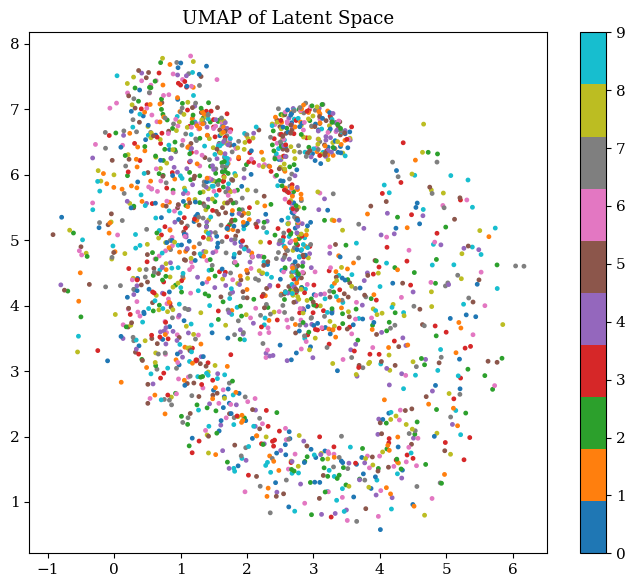

Saved latent UMAP to: figures/latent_umap.pdf


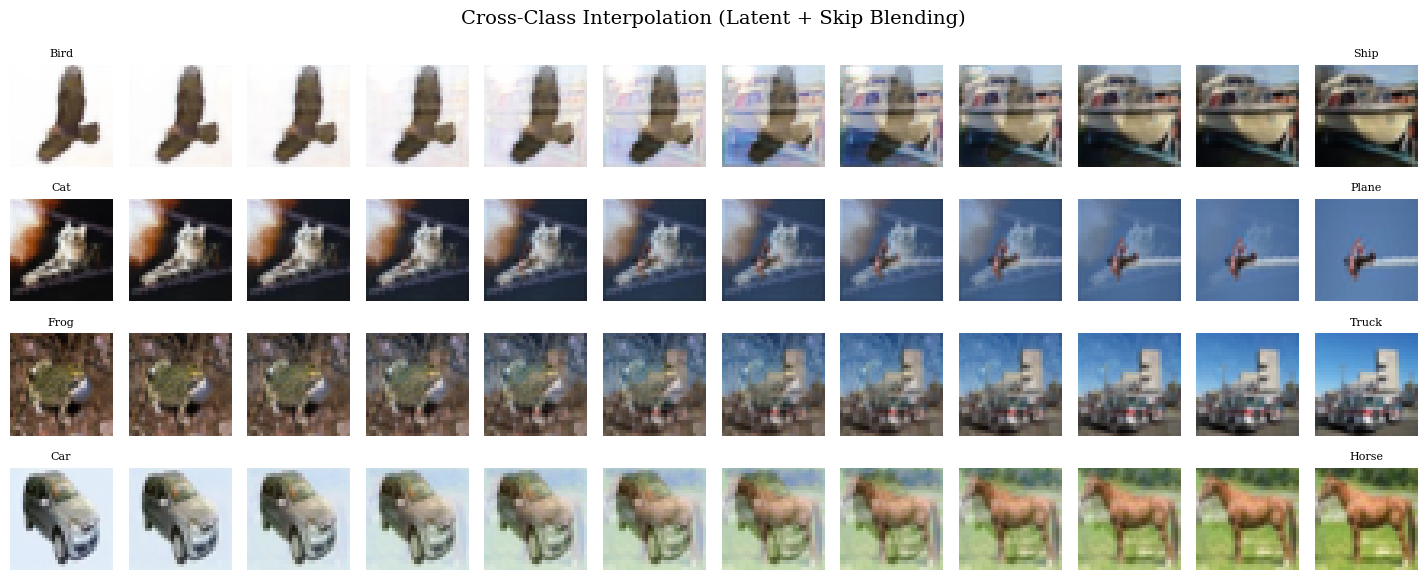

Saved cross-class interpolation to: figures/cross_class_interpolation.pdf


In [5]:
# CELL 4: Evaluation and visualisations (PSNR, SSIM, LPIPS, FID, grids, UMAP, histograms)
run_eval()

In [6]:
# CELL 5: Ablation experiments (latent dims, schedules, with/without diffusion)
# WARNING: This can be computationally expensive.
run_ablation()


========== Ablation: ld=64,sched=linear,diff=True ==========

[AE warm-up] ld=64,sched=linear,diff=True


AE E00: train=7.404e-03, val=1.861e-03


AE E01: train=2.093e-03, val=1.136e-03


AE E02: train=1.689e-03, val=8.757e-04


AE E03: train=1.586e-03, val=9.495e-04


AE E04: train=1.353e-03, val=6.973e-04


AE E05: train=1.274e-03, val=9.834e-04


AE E06: train=1.278e-03, val=7.231e-04


AE E07: train=1.207e-03, val=6.491e-04


AE E08: train=1.114e-03, val=6.960e-04


AE E09: train=1.139e-03, val=7.488e-04

[Joint phase] ld=64,sched=linear,diff=True


Joint E00: AE=9.204e-04, DIFF=7.315e-02, TOT=1.103e-03, VAL=5.882e-04, λ=0.901


Joint E01: AE=7.976e-04, DIFF=9.479e-03, TOT=1.246e-03, VAL=3.275e-04, λ=4.777


Joint E02: AE=7.261e-04, DIFF=3.592e-03, TOT=1.280e-03, VAL=3.603e-04, λ=11.908


Joint E03: AE=7.415e-04, DIFF=1.879e-03, TOT=1.381e-03, VAL=3.557e-04, λ=20.591


Joint E04: AE=6.484e-04, DIFF=1.132e-03, TOT=1.244e-03, VAL=3.195e-04, λ=28.064


Joint E05: AE=6.509e-04, DIFF=1.005e-03, TOT=1.267e-03, VAL=3.394e-04, λ=34.678


Joint E06: AE=6.119e-04, DIFF=5.468e-04, TOT=1.133e-03, VAL=3.332e-04, λ=61.629


Joint E07: AE=6.205e-04, DIFF=6.529e-04, TOT=1.250e-03, VAL=3.161e-04, λ=58.220


Joint E08: AE=5.689e-04, DIFF=5.571e-04, TOT=1.195e-03, VAL=3.528e-04, λ=39.101


Joint E09: AE=5.495e-04, DIFF=4.337e-04, TOT=1.018e-03, VAL=2.918e-04, λ=68.794
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=64,sched=linear,diff=False ==========

[AE warm-up] ld=64,sched=linear,diff=False


AE E00: train=7.404e-03, val=1.861e-03


AE E01: train=2.093e-03, val=1.136e-03


AE E02: train=1.689e-03, val=8.757e-04


AE E03: train=1.586e-03, val=9.495e-04


AE E04: train=1.353e-03, val=6.973e-04


AE E05: train=1.274e-03, val=9.834e-04


AE E06: train=1.278e-03, val=7.231e-04


AE E07: train=1.207e-03, val=6.491e-04


AE E08: train=1.114e-03, val=6.960e-04


AE E09: train=1.139e-03, val=7.488e-04

[Joint phase] ld=64,sched=linear,diff=False


Joint E00: AE=9.210e-04, DIFF=0.000e+00, TOT=9.210e-04, VAL=5.647e-04, λ=0.000


Joint E01: AE=7.970e-04, DIFF=0.000e+00, TOT=7.970e-04, VAL=3.271e-04, λ=0.000


Joint E02: AE=7.259e-04, DIFF=0.000e+00, TOT=7.259e-04, VAL=3.596e-04, λ=0.000


Joint E03: AE=7.415e-04, DIFF=0.000e+00, TOT=7.415e-04, VAL=3.564e-04, λ=0.000


Joint E04: AE=6.489e-04, DIFF=0.000e+00, TOT=6.489e-04, VAL=3.183e-04, λ=0.000


Joint E05: AE=6.509e-04, DIFF=0.000e+00, TOT=6.509e-04, VAL=3.359e-04, λ=0.000


Joint E06: AE=6.119e-04, DIFF=0.000e+00, TOT=6.119e-04, VAL=3.327e-04, λ=0.000


Joint E07: AE=6.204e-04, DIFF=0.000e+00, TOT=6.204e-04, VAL=3.162e-04, λ=0.000


Joint E08: AE=5.694e-04, DIFF=0.000e+00, TOT=5.694e-04, VAL=3.485e-04, λ=0.000


Joint E09: AE=5.491e-04, DIFF=0.000e+00, TOT=5.491e-04, VAL=2.918e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=64,sched=cosine,diff=True ==========

[AE warm-up] ld=64,sched=cosine,diff=True


AE E00: train=7.404e-03, val=1.861e-03


AE E01: train=2.093e-03, val=1.136e-03


AE E02: train=1.689e-03, val=8.757e-04


AE E03: train=1.586e-03, val=9.495e-04


AE E04: train=1.353e-03, val=6.973e-04


AE E05: train=1.274e-03, val=9.834e-04


AE E06: train=1.278e-03, val=7.231e-04


AE E07: train=1.207e-03, val=6.491e-04


AE E08: train=1.114e-03, val=6.960e-04


AE E09: train=1.139e-03, val=7.488e-04

[Joint phase] ld=64,sched=cosine,diff=True


Joint E00: AE=9.204e-04, DIFF=5.752e-02, TOT=1.057e-03, VAL=5.830e-04, λ=1.087


Joint E01: AE=7.971e-04, DIFF=4.835e-03, TOT=1.142e-03, VAL=3.260e-04, λ=9.417


Joint E02: AE=7.260e-04, DIFF=1.536e-03, TOT=1.238e-03, VAL=3.597e-04, λ=29.263


Joint E03: AE=7.427e-04, DIFF=7.589e-04, TOT=1.367e-03, VAL=3.537e-04, λ=55.546


Joint E04: AE=6.483e-04, DIFF=4.905e-04, TOT=1.275e-03, VAL=3.199e-04, λ=62.451


Joint E05: AE=6.509e-04, DIFF=3.604e-04, TOT=1.235e-03, VAL=3.418e-04, λ=93.156


Joint E06: AE=6.115e-04, DIFF=2.563e-04, TOT=1.177e-03, VAL=3.328e-04, λ=125.097


Joint E07: AE=6.203e-04, DIFF=2.336e-04, TOT=1.223e-03, VAL=3.156e-04, λ=140.054


Joint E08: AE=5.693e-04, DIFF=2.239e-04, TOT=1.154e-03, VAL=3.484e-04, λ=123.792


Joint E09: AE=5.485e-04, DIFF=1.601e-04, TOT=1.047e-03, VAL=2.901e-04, λ=172.407
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=64,sched=cosine,diff=False ==========

[AE warm-up] ld=64,sched=cosine,diff=False


AE E00: train=7.404e-03, val=1.861e-03


AE E01: train=2.093e-03, val=1.136e-03


AE E02: train=1.689e-03, val=8.757e-04


AE E03: train=1.586e-03, val=9.495e-04


AE E04: train=1.353e-03, val=6.973e-04


AE E05: train=1.274e-03, val=9.834e-04


AE E06: train=1.278e-03, val=7.231e-04


AE E07: train=1.207e-03, val=6.491e-04


AE E08: train=1.114e-03, val=6.960e-04


AE E09: train=1.139e-03, val=7.488e-04

[Joint phase] ld=64,sched=cosine,diff=False


Joint E00: AE=9.210e-04, DIFF=0.000e+00, TOT=9.210e-04, VAL=5.647e-04, λ=0.000


Joint E01: AE=7.970e-04, DIFF=0.000e+00, TOT=7.970e-04, VAL=3.271e-04, λ=0.000


Joint E02: AE=7.259e-04, DIFF=0.000e+00, TOT=7.259e-04, VAL=3.596e-04, λ=0.000


Joint E03: AE=7.415e-04, DIFF=0.000e+00, TOT=7.415e-04, VAL=3.564e-04, λ=0.000


Joint E04: AE=6.489e-04, DIFF=0.000e+00, TOT=6.489e-04, VAL=3.183e-04, λ=0.000


Joint E05: AE=6.509e-04, DIFF=0.000e+00, TOT=6.509e-04, VAL=3.359e-04, λ=0.000


Joint E06: AE=6.119e-04, DIFF=0.000e+00, TOT=6.119e-04, VAL=3.327e-04, λ=0.000


Joint E07: AE=6.204e-04, DIFF=0.000e+00, TOT=6.204e-04, VAL=3.162e-04, λ=0.000


Joint E08: AE=5.694e-04, DIFF=0.000e+00, TOT=5.694e-04, VAL=3.485e-04, λ=0.000


Joint E09: AE=5.491e-04, DIFF=0.000e+00, TOT=5.491e-04, VAL=2.918e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=128,sched=linear,diff=True ==========

[AE warm-up] ld=128,sched=linear,diff=True


AE E00: train=8.541e-03, val=1.966e-03


AE E01: train=2.126e-03, val=2.163e-03


AE E02: train=1.773e-03, val=9.387e-04


AE E03: train=1.538e-03, val=7.622e-04


AE E04: train=1.346e-03, val=1.151e-03


AE E05: train=1.280e-03, val=5.245e-03


AE E06: train=1.260e-03, val=7.228e-04


AE E07: train=1.267e-03, val=6.926e-04


AE E08: train=1.054e-03, val=4.435e-04


AE E09: train=1.073e-03, val=1.047e-03

[Joint phase] ld=128,sched=linear,diff=True


Joint E00: AE=8.715e-04, DIFF=1.145e-01, TOT=1.110e-03, VAL=3.467e-04, λ=0.330


Joint E01: AE=7.867e-04, DIFF=1.148e-02, TOT=1.199e-03, VAL=5.758e-04, λ=2.109


Joint E02: AE=7.940e-04, DIFF=3.390e-03, TOT=1.348e-03, VAL=3.599e-04, λ=6.737


Joint E03: AE=6.330e-04, DIFF=1.509e-03, TOT=1.165e-03, VAL=3.914e-04, λ=12.370


Joint E04: AE=6.541e-04, DIFF=8.958e-04, TOT=1.234e-03, VAL=5.136e-04, λ=19.034


Joint E05: AE=6.312e-04, DIFF=7.935e-04, TOT=1.230e-03, VAL=2.905e-04, λ=23.533


Joint E06: AE=5.920e-04, DIFF=4.668e-04, TOT=1.125e-03, VAL=3.198e-04, λ=34.563


Joint E07: AE=5.481e-04, DIFF=4.828e-04, TOT=1.092e-03, VAL=2.857e-04, λ=35.137


Joint E08: AE=5.458e-04, DIFF=3.602e-04, TOT=1.115e-03, VAL=2.654e-04, λ=28.816


Joint E09: AE=5.071e-04, DIFF=3.265e-04, TOT=9.532e-04, VAL=3.249e-04, λ=46.016
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=128,sched=linear,diff=False ==========

[AE warm-up] ld=128,sched=linear,diff=False


AE E00: train=8.541e-03, val=1.966e-03


AE E01: train=2.126e-03, val=2.163e-03


AE E02: train=1.773e-03, val=9.387e-04


AE E03: train=1.538e-03, val=7.622e-04


AE E04: train=1.346e-03, val=1.151e-03


AE E05: train=1.280e-03, val=5.245e-03


AE E06: train=1.260e-03, val=7.228e-04


AE E07: train=1.267e-03, val=6.926e-04


AE E08: train=1.054e-03, val=4.435e-04


AE E09: train=1.073e-03, val=1.047e-03

[Joint phase] ld=128,sched=linear,diff=False


Joint E00: AE=8.714e-04, DIFF=0.000e+00, TOT=8.714e-04, VAL=3.498e-04, λ=0.000


Joint E01: AE=7.875e-04, DIFF=0.000e+00, TOT=7.875e-04, VAL=5.704e-04, λ=0.000


Joint E02: AE=7.930e-04, DIFF=0.000e+00, TOT=7.930e-04, VAL=3.560e-04, λ=0.000


Joint E03: AE=6.337e-04, DIFF=0.000e+00, TOT=6.337e-04, VAL=3.911e-04, λ=0.000


Joint E04: AE=6.552e-04, DIFF=0.000e+00, TOT=6.552e-04, VAL=5.381e-04, λ=0.000


Joint E05: AE=6.265e-04, DIFF=0.000e+00, TOT=6.265e-04, VAL=2.992e-04, λ=0.000


Joint E06: AE=6.017e-04, DIFF=0.000e+00, TOT=6.017e-04, VAL=3.195e-04, λ=0.000


Joint E07: AE=5.463e-04, DIFF=0.000e+00, TOT=5.463e-04, VAL=2.875e-04, λ=0.000


Joint E08: AE=5.467e-04, DIFF=0.000e+00, TOT=5.467e-04, VAL=2.653e-04, λ=0.000


Joint E09: AE=5.100e-04, DIFF=0.000e+00, TOT=5.100e-04, VAL=3.299e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=128,sched=cosine,diff=True ==========

[AE warm-up] ld=128,sched=cosine,diff=True


AE E00: train=8.541e-03, val=1.966e-03


AE E01: train=2.126e-03, val=2.163e-03


AE E02: train=1.773e-03, val=9.387e-04


AE E03: train=1.538e-03, val=7.622e-04


AE E04: train=1.346e-03, val=1.151e-03


AE E05: train=1.280e-03, val=5.245e-03


AE E06: train=1.260e-03, val=7.228e-04


AE E07: train=1.267e-03, val=6.926e-04


AE E08: train=1.054e-03, val=4.435e-04


AE E09: train=1.073e-03, val=1.047e-03

[Joint phase] ld=128,sched=cosine,diff=True


Joint E00: AE=8.715e-04, DIFF=9.561e-02, TOT=1.069e-03, VAL=3.460e-04, λ=0.386


Joint E01: AE=7.866e-04, DIFF=6.642e-03, TOT=1.111e-03, VAL=5.742e-04, λ=3.803


Joint E02: AE=7.938e-04, DIFF=1.553e-03, TOT=1.302e-03, VAL=3.585e-04, λ=15.096


Joint E03: AE=6.329e-04, DIFF=7.279e-04, TOT=1.212e-03, VAL=3.915e-04, λ=20.703


Joint E04: AE=6.544e-04, DIFF=4.130e-04, TOT=1.193e-03, VAL=5.274e-04, λ=41.314


Joint E05: AE=6.326e-04, DIFF=3.375e-04, TOT=1.220e-03, VAL=2.902e-04, λ=54.431


Joint E06: AE=5.926e-04, DIFF=2.130e-04, TOT=1.145e-03, VAL=3.201e-04, λ=70.557


Joint E07: AE=5.476e-04, DIFF=1.924e-04, TOT=1.081e-03, VAL=2.856e-04, λ=76.224


Joint E08: AE=5.455e-04, DIFF=2.109e-04, TOT=1.154e-03, VAL=2.656e-04, λ=46.567


Joint E09: AE=5.069e-04, DIFF=1.339e-04, TOT=9.354e-04, VAL=3.229e-04, λ=84.222
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=128,sched=cosine,diff=False ==========

[AE warm-up] ld=128,sched=cosine,diff=False


AE E00: train=8.541e-03, val=1.966e-03


AE E01: train=2.126e-03, val=2.163e-03


AE E02: train=1.773e-03, val=9.387e-04


AE E03: train=1.538e-03, val=7.622e-04


AE E04: train=1.346e-03, val=1.151e-03


AE E05: train=1.280e-03, val=5.245e-03


AE E06: train=1.260e-03, val=7.228e-04


AE E07: train=1.267e-03, val=6.926e-04


AE E08: train=1.054e-03, val=4.435e-04


AE E09: train=1.073e-03, val=1.047e-03

[Joint phase] ld=128,sched=cosine,diff=False


Joint E00: AE=8.714e-04, DIFF=0.000e+00, TOT=8.714e-04, VAL=3.498e-04, λ=0.000


Joint E01: AE=7.875e-04, DIFF=0.000e+00, TOT=7.875e-04, VAL=5.704e-04, λ=0.000


Joint E02: AE=7.930e-04, DIFF=0.000e+00, TOT=7.930e-04, VAL=3.560e-04, λ=0.000


Joint E03: AE=6.337e-04, DIFF=0.000e+00, TOT=6.337e-04, VAL=3.911e-04, λ=0.000


Joint E04: AE=6.552e-04, DIFF=0.000e+00, TOT=6.552e-04, VAL=5.381e-04, λ=0.000


Joint E05: AE=6.265e-04, DIFF=0.000e+00, TOT=6.265e-04, VAL=2.992e-04, λ=0.000


Joint E06: AE=6.017e-04, DIFF=0.000e+00, TOT=6.017e-04, VAL=3.195e-04, λ=0.000


Joint E07: AE=5.463e-04, DIFF=0.000e+00, TOT=5.463e-04, VAL=2.875e-04, λ=0.000


Joint E08: AE=5.467e-04, DIFF=0.000e+00, TOT=5.467e-04, VAL=2.653e-04, λ=0.000


Joint E09: AE=5.100e-04, DIFF=0.000e+00, TOT=5.100e-04, VAL=3.299e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=256,sched=linear,diff=True ==========

[AE warm-up] ld=256,sched=linear,diff=True


AE E00: train=7.543e-03, val=1.950e-03


AE E01: train=2.221e-03, val=1.967e-03


AE E02: train=1.770e-03, val=1.103e-03


AE E03: train=1.540e-03, val=7.333e-04


AE E04: train=1.427e-03, val=1.338e-03


AE E05: train=1.392e-03, val=7.187e-04


AE E06: train=1.253e-03, val=8.148e-04


AE E07: train=1.158e-03, val=5.817e-04


AE E08: train=1.076e-03, val=4.587e-04


AE E09: train=1.141e-03, val=8.517e-04

[Joint phase] ld=256,sched=linear,diff=True


Joint E00: AE=1.017e-03, DIFF=2.066e-01, TOT=1.273e-03, VAL=4.099e-04, λ=0.134


Joint E01: AE=8.192e-04, DIFF=1.182e-02, TOT=1.184e-03, VAL=4.311e-04, λ=1.021


Joint E02: AE=7.406e-04, DIFF=3.025e-03, TOT=1.230e-03, VAL=6.020e-04, λ=3.765


Joint E03: AE=6.947e-04, DIFF=1.332e-03, TOT=1.259e-03, VAL=4.320e-04, λ=7.955


Joint E04: AE=6.154e-04, DIFF=8.106e-04, TOT=1.205e-03, VAL=4.411e-04, λ=9.417


Joint E05: AE=5.747e-04, DIFF=6.682e-04, TOT=1.135e-03, VAL=3.224e-04, λ=10.343


Joint E06: AE=5.769e-04, DIFF=4.461e-04, TOT=1.087e-03, VAL=3.055e-04, λ=16.718


Joint E07: AE=5.578e-04, DIFF=4.867e-04, TOT=1.115e-03, VAL=3.508e-04, λ=17.612


Joint E08: AE=5.563e-04, DIFF=3.696e-04, TOT=1.117e-03, VAL=3.240e-04, λ=16.930


Joint E09: AE=5.088e-04, DIFF=3.019e-04, TOT=9.814e-04, VAL=3.091e-04, λ=22.632
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=256,sched=linear,diff=False ==========

[AE warm-up] ld=256,sched=linear,diff=False


AE E00: train=7.543e-03, val=1.950e-03


AE E01: train=2.221e-03, val=1.967e-03


AE E02: train=1.770e-03, val=1.103e-03


AE E03: train=1.540e-03, val=7.333e-04


AE E04: train=1.427e-03, val=1.338e-03


AE E05: train=1.392e-03, val=7.187e-04


AE E06: train=1.253e-03, val=8.148e-04


AE E07: train=1.158e-03, val=5.817e-04


AE E08: train=1.076e-03, val=4.587e-04


AE E09: train=1.141e-03, val=8.517e-04

[Joint phase] ld=256,sched=linear,diff=False


Joint E00: AE=1.009e-03, DIFF=0.000e+00, TOT=1.009e-03, VAL=4.315e-04, λ=0.000


Joint E01: AE=8.226e-04, DIFF=0.000e+00, TOT=8.226e-04, VAL=4.281e-04, λ=0.000


Joint E02: AE=7.441e-04, DIFF=0.000e+00, TOT=7.441e-04, VAL=5.909e-04, λ=0.000


Joint E03: AE=6.995e-04, DIFF=0.000e+00, TOT=6.995e-04, VAL=4.409e-04, λ=0.000


Joint E04: AE=6.163e-04, DIFF=0.000e+00, TOT=6.163e-04, VAL=4.445e-04, λ=0.000


Joint E05: AE=5.695e-04, DIFF=0.000e+00, TOT=5.695e-04, VAL=3.198e-04, λ=0.000


Joint E06: AE=5.725e-04, DIFF=0.000e+00, TOT=5.725e-04, VAL=3.089e-04, λ=0.000


Joint E07: AE=5.542e-04, DIFF=0.000e+00, TOT=5.542e-04, VAL=3.461e-04, λ=0.000


Joint E08: AE=5.530e-04, DIFF=0.000e+00, TOT=5.530e-04, VAL=3.203e-04, λ=0.000


Joint E09: AE=5.024e-04, DIFF=0.000e+00, TOT=5.024e-04, VAL=3.252e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=256,sched=cosine,diff=True ==========

[AE warm-up] ld=256,sched=cosine,diff=True


AE E00: train=7.543e-03, val=1.950e-03


AE E01: train=2.221e-03, val=1.967e-03


AE E02: train=1.770e-03, val=1.103e-03


AE E03: train=1.540e-03, val=7.333e-04


AE E04: train=1.427e-03, val=1.338e-03


AE E05: train=1.392e-03, val=7.187e-04


AE E06: train=1.253e-03, val=8.148e-04


AE E07: train=1.158e-03, val=5.817e-04


AE E08: train=1.076e-03, val=4.587e-04


AE E09: train=1.141e-03, val=8.517e-04

[Joint phase] ld=256,sched=cosine,diff=True


Joint E00: AE=1.016e-03, DIFF=1.796e-01, TOT=1.243e-03, VAL=4.097e-04, λ=0.154


Joint E01: AE=8.192e-04, DIFF=7.576e-03, TOT=1.115e-03, VAL=4.308e-04, λ=1.608


Joint E02: AE=7.393e-04, DIFF=1.473e-03, TOT=1.186e-03, VAL=6.012e-04, λ=7.312


Joint E03: AE=6.947e-04, DIFF=6.543e-04, TOT=1.260e-03, VAL=4.339e-04, λ=15.154


Joint E04: AE=6.156e-04, DIFF=4.253e-04, TOT=1.196e-03, VAL=4.391e-04, λ=19.234


Joint E05: AE=5.757e-04, DIFF=3.307e-04, TOT=1.127e-03, VAL=3.214e-04, λ=22.928


Joint E06: AE=5.772e-04, DIFF=2.334e-04, TOT=1.099e-03, VAL=3.042e-04, λ=33.589


Joint E07: AE=5.575e-04, DIFF=1.969e-04, TOT=1.109e-03, VAL=3.518e-04, λ=35.606


Joint E08: AE=5.556e-04, DIFF=1.765e-04, TOT=1.098e-03, VAL=3.243e-04, λ=38.724


Joint E09: AE=5.086e-04, DIFF=1.340e-04, TOT=9.857e-04, VAL=3.090e-04, λ=49.240
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



========== Ablation: ld=256,sched=cosine,diff=False ==========

[AE warm-up] ld=256,sched=cosine,diff=False


AE E00: train=7.543e-03, val=1.950e-03


AE E01: train=2.221e-03, val=1.967e-03


AE E02: train=1.770e-03, val=1.103e-03


AE E03: train=1.540e-03, val=7.333e-04


AE E04: train=1.427e-03, val=1.338e-03


AE E05: train=1.392e-03, val=7.187e-04


AE E06: train=1.253e-03, val=8.148e-04


AE E07: train=1.158e-03, val=5.817e-04


AE E08: train=1.076e-03, val=4.587e-04


AE E09: train=1.141e-03, val=8.517e-04

[Joint phase] ld=256,sched=cosine,diff=False


Joint E00: AE=1.009e-03, DIFF=0.000e+00, TOT=1.009e-03, VAL=4.315e-04, λ=0.000


Joint E01: AE=8.226e-04, DIFF=0.000e+00, TOT=8.226e-04, VAL=4.281e-04, λ=0.000


Joint E02: AE=7.441e-04, DIFF=0.000e+00, TOT=7.441e-04, VAL=5.909e-04, λ=0.000


Joint E03: AE=6.995e-04, DIFF=0.000e+00, TOT=6.995e-04, VAL=4.409e-04, λ=0.000


Joint E04: AE=6.163e-04, DIFF=0.000e+00, TOT=6.163e-04, VAL=4.445e-04, λ=0.000


Joint E05: AE=5.695e-04, DIFF=0.000e+00, TOT=5.695e-04, VAL=3.198e-04, λ=0.000


Joint E06: AE=5.725e-04, DIFF=0.000e+00, TOT=5.725e-04, VAL=3.089e-04, λ=0.000


Joint E07: AE=5.542e-04, DIFF=0.000e+00, TOT=5.542e-04, VAL=3.461e-04, λ=0.000


Joint E08: AE=5.530e-04, DIFF=0.000e+00, TOT=5.530e-04, VAL=3.203e-04, λ=0.000


Joint E09: AE=5.024e-04, DIFF=0.000e+00, TOT=5.024e-04, VAL=3.252e-04, λ=0.000
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth



Full ablation summary:
 latent_dim schedule  use_diffusion    PSNR   SSIM  LPIPS    FID  FID_samples
         64   linear           True 41.9074 0.9969 0.0036 2.7323         2000
         64   linear          False 41.9055 0.9969 0.0036 2.7360         2000
         64   cosine           True 41.9355 0.9969 0.0036 2.7297         2000
         64   cosine          False 41.9055 0.9969 0.0036 2.7360         2000
        128   linear           True 41.4294 0.9967 0.0036 2.8203         2000
        128   linear          False 41.3665 0.9967 0.0037 2.8393         2000
        128   cosine           True 41.4575 0.9967 0.0036 2.8201         2000
        128   cosine          False 41.3665 0.9967 0.0037 2.8393         2000
        256   linear           True 41.7034 0.9966 0.0033 2.6899         2000
        256   linear          False 41.4724 0.9965 0.0034 2.7004         2000
        256   cosine           True 41.7045 0.9966 0.0033 2.6908         2000
        256   cosine          False 41.4